# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [25]:
pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sys
!{sys.executable} -m pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

**1.** The Hamiltonian is an operator/function that associated with the system energy. It is the total energy of the system, including kinetic and potential energy, of all the particles within the system. It is extremeley important to quantuam theory. 

Sources:
[Wikepedia](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)

[Hyper physics](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html)


**2.** The force law defined in the function harmonic_oscillator() is Hooke's Law. It returns the harmonic oscillators (spring) potential energy.

**3.** The eigen states that are reffered too are states of a particle that have quauntifable characterisitics that can be measured.They are states that have a definite value. In this case, they are measuring the finte energy levels of each state, with 0 being ground state and 30 being the maxium state. 

Sources:
[Physics Stack Exchange](https://physics.stackexchange.com/questions/485299/what-are-the-eigenstates-and-eigenvalues://)

[Wikepediea](https://en.wikipedia.org/wiki/Introduction_to_eigenstates#:~:text=An%20eigenstate%20is%20the%20measured%20state%20of%20some,must%20have%20a%20definite%20value%2C%20called%20an%20eigenvalue.://)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.02410101890563965
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


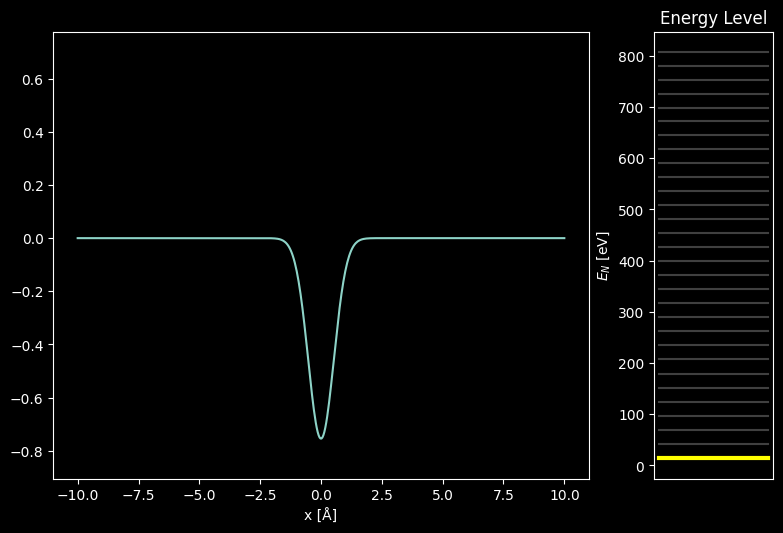

In [6]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)


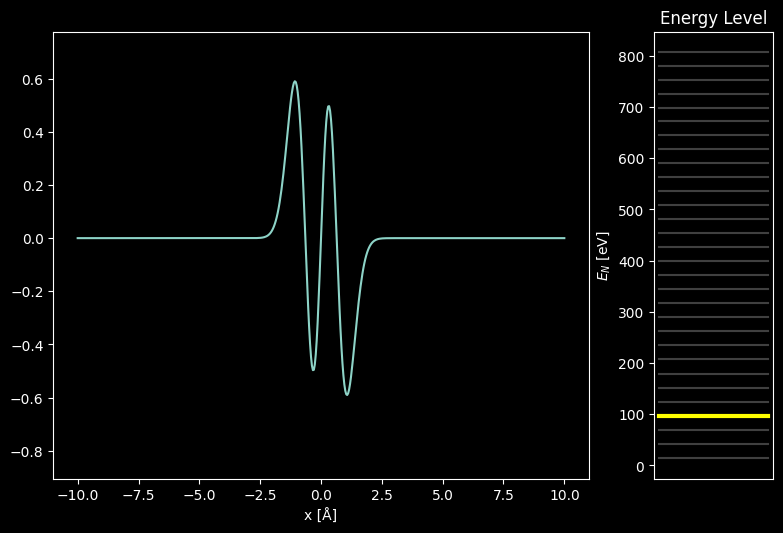

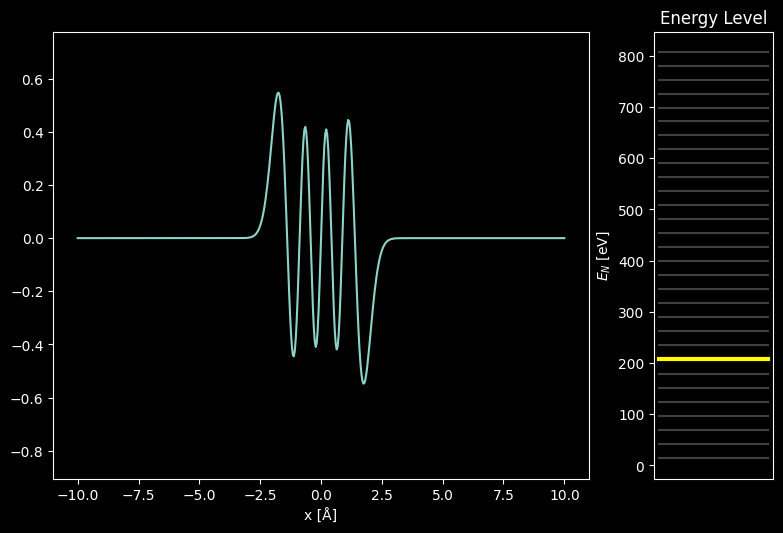

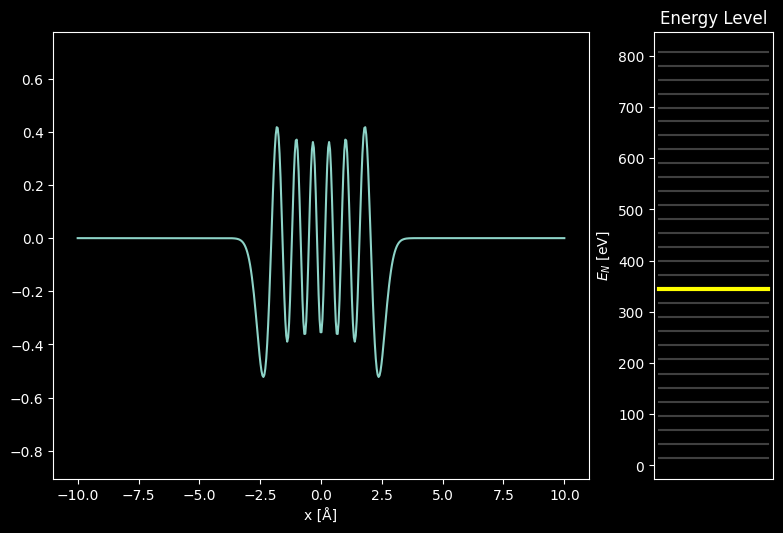

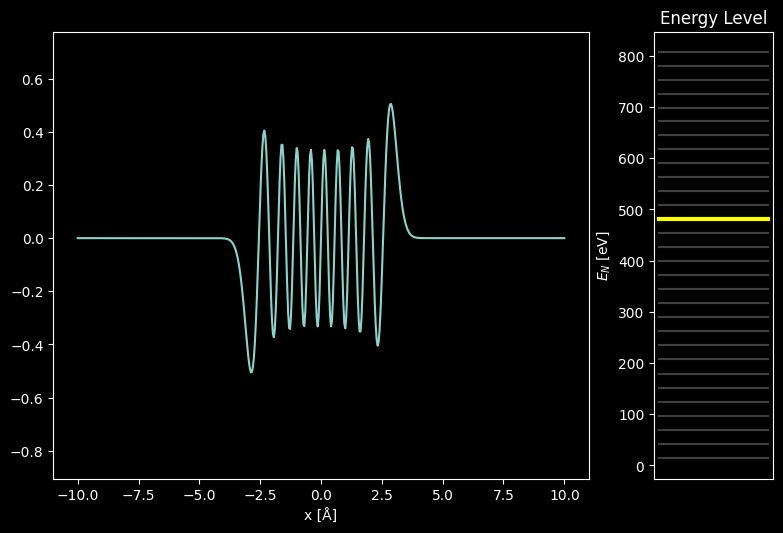

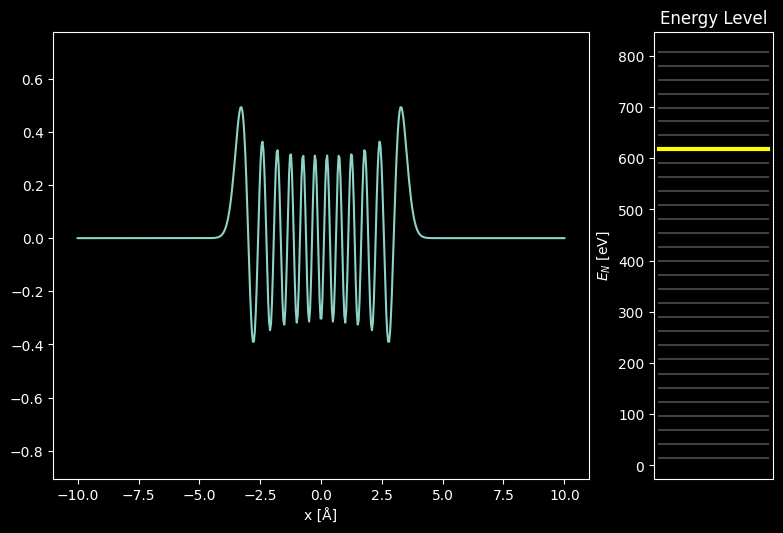

In [7]:
#Problem 4
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(7)
visualization.plot_eigenstate(12)
visualization.plot_eigenstate(17)
visualization.plot_eigenstate(22)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

**5.** The unit is Angstroms. It is one hundred-millionth of a centimer, and is measuring position of the particle in relation to its equilibrium position. 

**6.** The plots are showing wave functions because they are plotting eigen states, which are solutions to Shcrodingers wave Equations. The graph also goes less than 0, which a probability function is not capable of because it returns a value from 0-1

Computing...
Took 0.015277385711669922
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


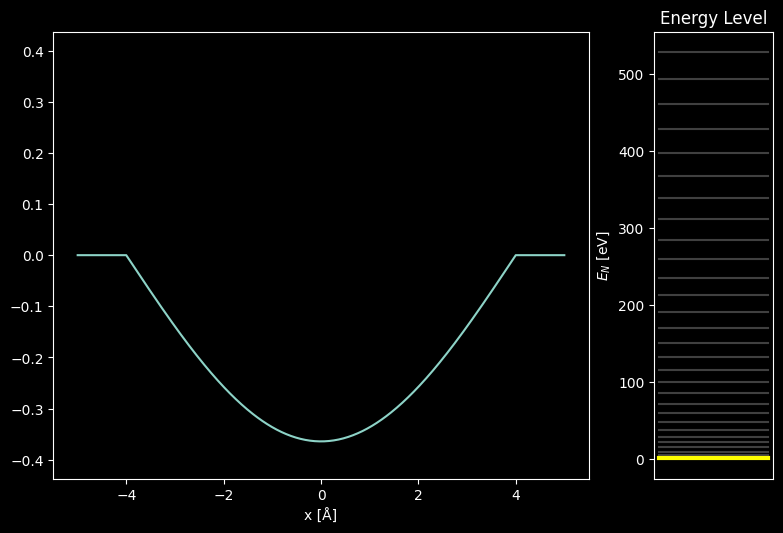

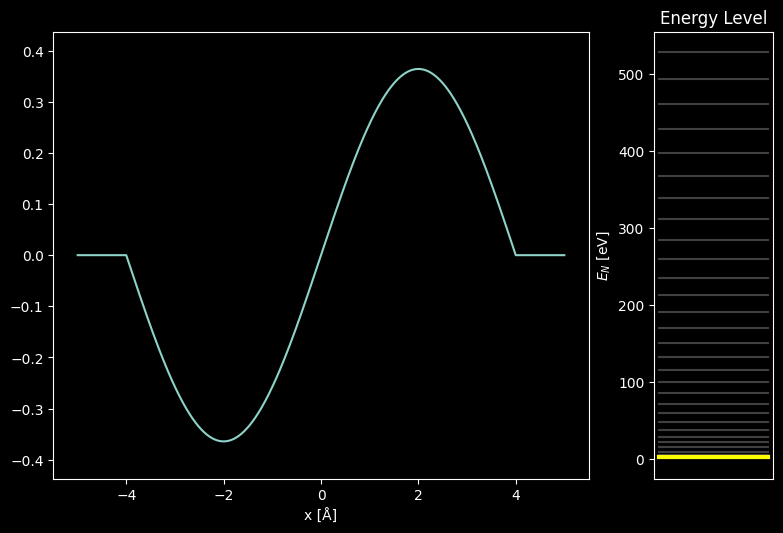

In [8]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

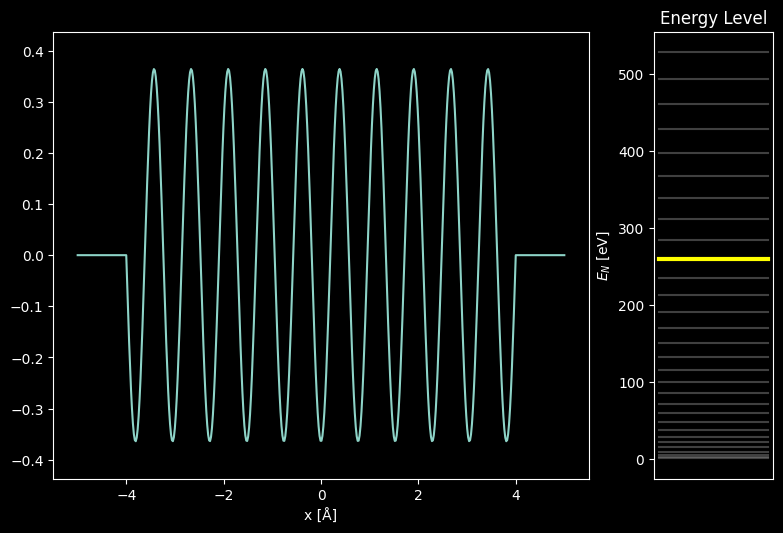

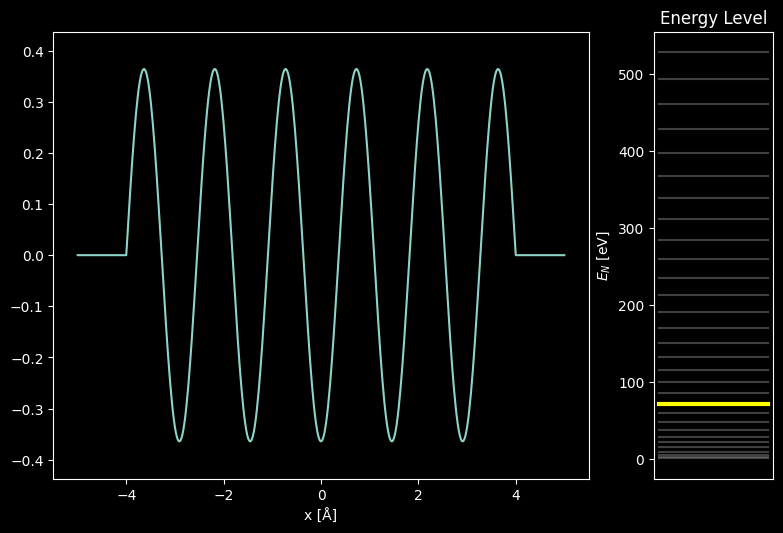

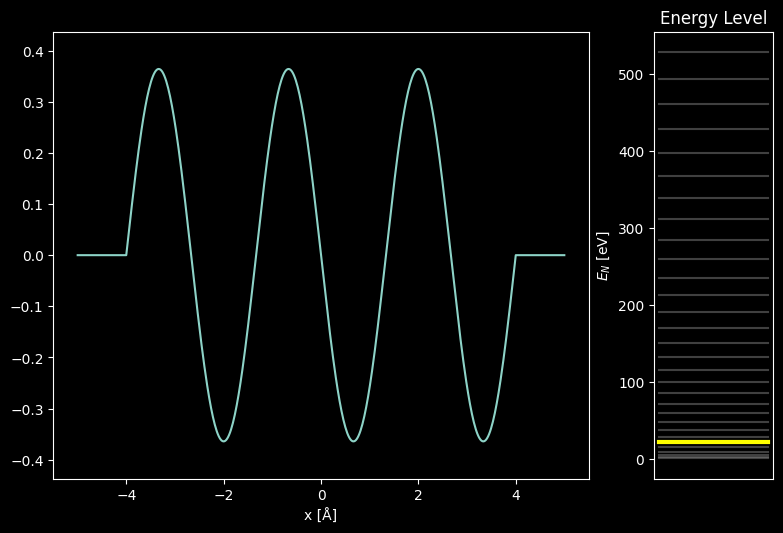

In [11]:
#Problem 7
visualization_sw.plot_eigenstate(20)
visualization_sw.plot_eigenstate(10)
visualization_sw.plot_eigenstate(5)

**8.** The SHO Eignestates have a much higher frequency than the infinite square well Eignestates. The infinite square well eignestates do not converge at 0 as x approaches infinty, and they have a very sharp cutoff on the ends when compared to the SHOs, which does not follow a sin wave. 

**9.** The extrema on each eigneplot is alwys n +1, or one more than the quantum number.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.05065584182739258
[  0.56789078   2.27148361   5.11053937   9.08465736  14.19327195
  20.43564783  27.81087347  36.31785278  45.95529442  56.7216985
  68.61533994  81.63424778  95.77617929 111.03858754 127.41858022
 144.91286722 163.51769258 183.22874534 204.0410404  225.94875637
 248.94500937 273.02152892 298.16817772 324.37221145 351.61708013
 379.88036353 409.12991816 439.31586763 470.35121709 502.0528888 ]


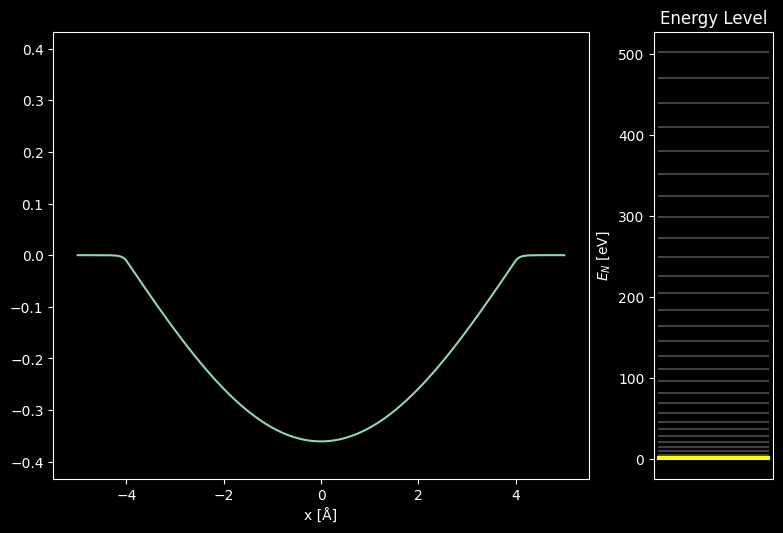

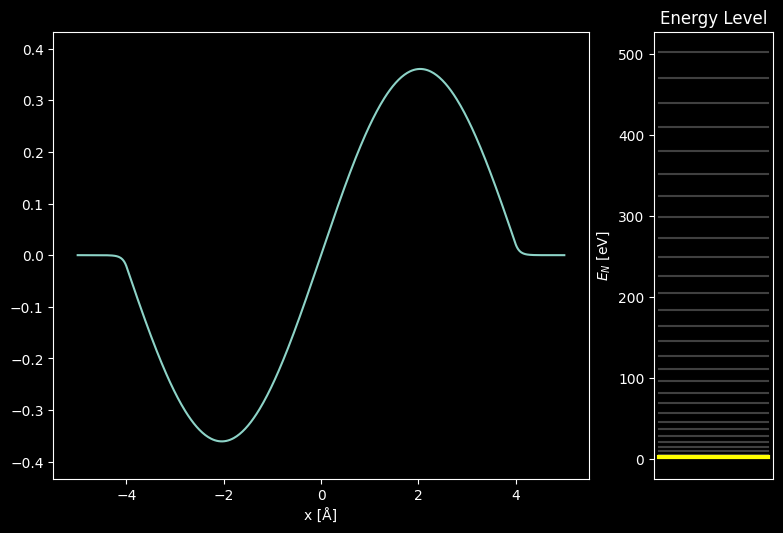

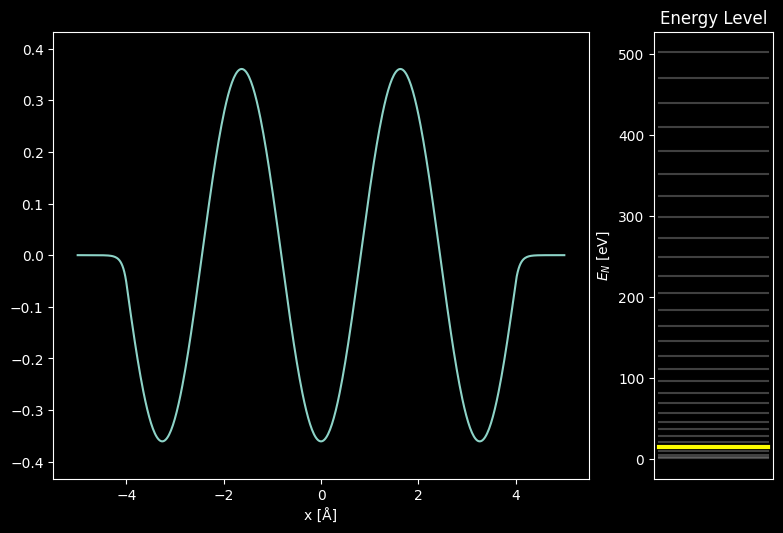

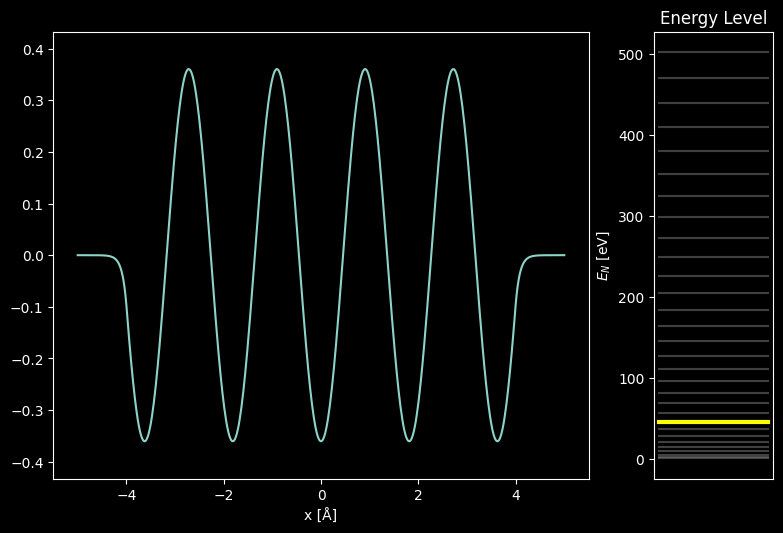

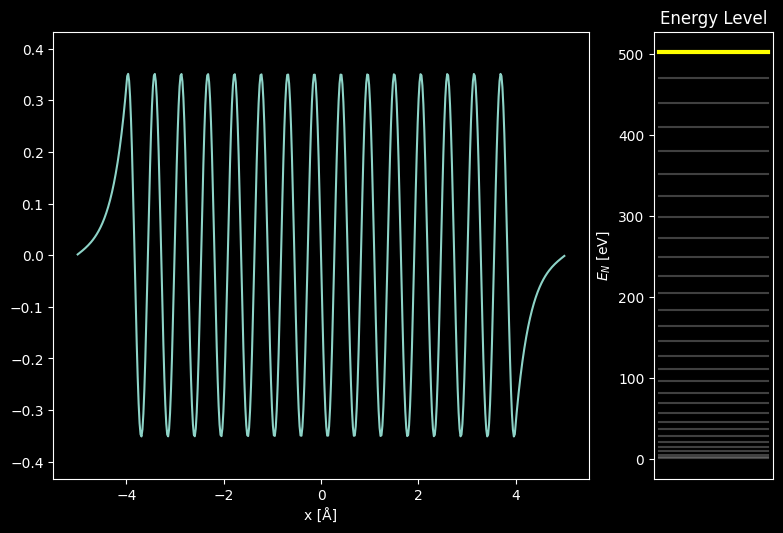

In [24]:
#Probelm 10
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = 20
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(4)
visualization_sw.plot_eigenstate(8)
visualization_sw.plot_eigenstate(29)

**11.** Based on the plots, I believe the particle can escape only if its quantum number is high enough. This is becaue as shown, the higher the quantum number, the more rounded (non 0 values) at the edge of the graph. My eigen state that is higher than the bound, has non zero values at the end of the graph when compared to the eigen states below the bounds. 